In [98]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, FixedLocator, MultipleLocator
import re

In [37]:

# Set the path of the directory that contains the CSV files
directory = '/Users/laceymorgan/Desktop/data_job_analysis/'

# Get a list of all CSV files in the directory
csv_files = [os.path.join(directory, file) for file in os.listdir(directory) if file.endswith('.csv')]

# Create an empty DataFrame to store the concatenated data
df = pd.DataFrame()

# Loop through each CSV file and concatenate the data
for file in csv_files:
    data = pd.read_csv(file)
    df = pd.concat([df, data], ignore_index=True)


In [38]:

df.head()

,job_title,company_name,job_description,via,job_id,posted_hours_ago,report_run_datetime,apply_options,rating,#_of_reviews,...,salary_based_on,salary_from,salary_to,salary_source,my_keywords,job_description_summary,sentiment_score,salary_mention,named_entity_recognition,job_id.1
0,Program Operations Management Analyst,Google,Minimum qualifications:\n• Bachelor's degree o...,via Girlboss Jobs,eyJqb2JfdGl0bGUiOiJQcm9ncmFtIE9wZXJhdGlvbnMgTW...,0,2023-02-21 06:39:38,https://jobs.girlboss.com/program-operations-m...,4.5,40353.0,...,Based on local employers,82000.0,130000.0,Salary.com,visualization sql tableau,• Knowledge of SQL and data visualization tool...,0.9965,"['range', 'between', '$109,000', '-', '$117,00...",(S\n (GPE Minimum/JJ)\n qualifications/NNS\n...,NaN
1,Data Center Operations Analyst,Adobe,Our Company\n\nChanging the world through digi...,via Adobe - Talentify,eyJqb2JfdGl0bGUiOiJEYXRhIENlbnRlciBPcGVyYXRpb2...,0,2023-02-21 06:39:38,https://adobe.talentify.io/job/data-center-ope...,4.4,8412.0,...,NaN,NaN,NaN,NaN,NaN,Changing the world through digital experiences...,0.9977,"['range', 'for', 'the', 'job', 'location', 'du...",(S\n Our/PRP$\n Company/NN\n Changing/VBG\n...,NaN
2,Business Operations Analyst,Juniper Networks,Job Title: Business Analyst - Global Service O...,via Salary.com,eyJqb2JfdGl0bGUiOiJCdXNpbmVzcyBPcGVyYXRpb25zIE...,0,2023-02-21 06:39:38,https://www.salary.com/job/juniper-networks/bu...,4.3,3943.0,...,Juniper Networks,76000.0,120000.0,Indeed,NaN,Responsibilities... The primary responsibility...,0.9741,salary not mentioned,(S\n (PERSON Job/NNP)\n Title/NNP\n :/:\n ...,NaN
3,Marketing Campaign Operations Analyst,Aquent,The Marketing Analytics team is looking for a ...,via Aquent Talent,eyJqb2JfdGl0bGUiOiJNYXJrZXRpbmcgQ2FtcGFpZ24gT3...,0,2023-02-21 06:39:38,https://aquenttalent.com/talent/jobs/181552?re...,4.2,940.0,...,NaN,NaN,NaN,NaN,sql,The Marketing Analytics team is looking for a ...,0.9979,salary not mentioned,(S\n The/DT\n Marketing/NNP\n Analytics/NNP...,NaN
4,Data Scientist (All Levels),Noblis,Responsibilities\n\nNoblis is seeking to hire ...,via Noblis - Careers - ICIMS,eyJqb2JfdGl0bGUiOiJEYXRhIFNjaWVudGlzdCAoQWxsIE...,0,2023-02-21 06:47:47,https://jobs-noblis.icims.com/jobs/21177/data-...,4.0,66.0,...,NaN,NaN,NaN,NaN,python,"As a Data Scientist with our team, you will be...",0.9990,"['at', 'Noblis', 'is', 'determined', 'by', 'va...",(S\n Responsibilities/NNS\n (PERSON Noblis/N...,NaN


In [39]:
# Dropping the duplicate job_id column
df = df.drop(columns='job_id.1')


In [ ]:
# Dropping the duplicate job_id column
df = df.drop(columns='Unnamed: 0')

In [45]:
df.count()

job_title                   1480
company_name                1480
job_description             1480
via                         1480
job_id                      1480
posted_hours_ago            1480
report_run_datetime         1480
apply_options               1480
rating                       900
#_of_reviews                 900
rating_source                900
salary_based_on              606
salary_from                  606
salary_to                    599
salary_source                606
my_keywords                  811
job_description_summary     1480
sentiment_score             1480
salary_mention              1480
named_entity_recognition    1480
dtype: int64

In [46]:
# Count the number of occurrences of each unique value in the 'job_id' column
job_id_counts = df['job_id'].value_counts()

# Select only the values that occur twice or more
job_id_counts_2 = job_id_counts[job_id_counts >=2]

# Get the count of values that occur exactly twice
num_jobs_with_2_instances = len(job_id_counts_2)

print(f'There were {num_jobs_with_2_instances} job listings that were captured twice or more.')

There were 200 job listings that were captured twice or more.


In [50]:
# Remove duplicate rows based on 'job_id'
df = df.drop_duplicates(subset=['job_id']).copy()

In [51]:
# Analyzing how much NLTK summarizer reduced the descriptions

df['job_desc_len'] = df['job_description'].str.len()
df['job_sum_len'] = df['job_description_summary'].str.len()

avg_job_desc_len = round(df['job_desc_len'].mean())
avg_job_sum_len = round(df['job_sum_len'].mean())
avg_desc_perc_change = round((avg_job_sum_len-avg_job_desc_len)/avg_job_desc_len *-100)

print(f'The average length of a job description was {avg_job_desc_len}, the NLTK summarizer brought the average length down to {avg_job_sum_len}.')
print(f'That is a reduction of {avg_desc_perc_change}% in length on average.')

The average length of a job description was 4204, the NLTK summarizer brought the average length down to 978.
That is a reduction of 77% in length on average.


In [65]:
# Examining how many listings had hits for my keywords

# Count the number of non-NaN values
keyword_matches = df['my_keywords'].count()

# Count the number of NaN values
keyword_nan = df['my_keywords'].isnull().sum()

# Print the results
print(f'{round(keyword_matches/len(df)*100,2)}% of listings had keyword matches with a count of: {keyword_matches}')
print(f'{round(keyword_nan/len(df)*100,2)}% of listings did not have keyword matches with a count of:  {keyword_nan}')

55.55% of listings had keyword matches with a count of: 711
44.45% of listings did not have keyword matches with a count of:  569


In [116]:
# Looking at the the most common job titles

top_overall_titles = df.groupby(df['job_title']).count()['job_description'].sort_values(ascending=False)[0:10]
# Calculate the percentage of total for each job title
total_count = len(df['job_description'])
percent_of_total = top_overall_titles.apply(lambda x: (x / total_count) * 100)

# Adding the percent of total column to the groupby object
top_overall_titles_with_pct = pd.concat([top_overall_titles, percent_of_total], axis=1, keys=['count', 'percent_of_total'])

# Round the percent column to two decimal places
top_overall_titles_with_pct['percent_of_total'] = top_overall_titles_with_pct['percent_of_total'].round(2)

print(top_overall_titles_with_pct)

                                     count  percent_of_total
job_title                                                   
Data Analyst                            92             10.00
Operations Analyst                      72              7.83
Senior Data Analyst                     30              3.26
Revenue Operations Analyst              25              2.72
Business Operations Analyst             24              2.61
Sales Operations Analyst (Remote)       18              1.96
Sr. Data Analyst                        17              1.85
Senior Data Analyst (Remote)            14              1.52
Sales Operations Analyst                11              1.20
Revenue Operations Analyst (Remote)     10              1.09


In [68]:
# Looking at the companies that have the most listings in the dataset

top_overall_comps = df.groupby(df['company_name']).count()['job_description'].sort_values(ascending=False)[0:10]
# Calculate the percentage of total for each job title
total_count = len(df['job_description'])
percent_of_total = top_overall_comps.apply(lambda x: (x / total_count) * 100)

# Adding the percent of total column to the groupby object
top_overall_comps_with_pct = pd.concat([top_overall_comps, percent_of_total], axis=1, keys=['count', 'percent_of_total'])

# Round the percent column to two decimal places
top_overall_comps_with_pct['percent_of_total'] = top_overall_comps_with_pct['percent_of_total'].round(2)

print(top_overall_comps_with_pct)

                         count  percent_of_total
company_name                                    
Softheon                    22              1.72
Rightway                    19              1.48
Robert Half                 18              1.41
Aquent                      16              1.25
Peraton                     15              1.17
Humana                      14              1.09
Headway                     14              1.09
Center for Fair Futures     12              0.94
Headway.co                  12              0.94
Uplight                     11              0.86


### Visualizations of Cumulative Data

The following three visualizations give an overview of the data collected over the course of the project. They show which companies are most frequently listing the jobs searched, the actual titles of the listings and where the jobs are being posted most frequently. 

Graphs are saved to an output file.

In [84]:
# Getting the top companies by # of listings 

top_overall_listers = df.groupby(df['company_name']).count()['job_title'].sort_values(ascending=False)[0:15]

top_overall_comps = top_overall_listers.index.tolist()
top_overall_comps_nums = top_overall_listers.values.tolist()

In [105]:
# Remove non-alphanumeric characters from top_comps
top_overall_comps = [comp.replace('\n', ' ') for comp in top_overall_comps]

ValueError: invalid literal for int() with base 10: 'Aon Corporation'

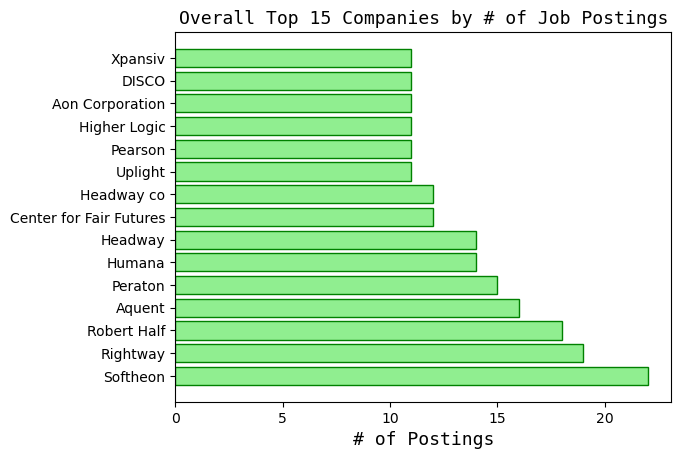

In [107]:

# Create horizontal bar chart for the overall top companies by # of listings 
plt.barh(top_overall_comps, top_overall_comps_nums, align='center', color='lightgreen', edgecolor='green')

# Set x-axis label, title, and ticks
plt.xlabel('# of Postings', fontdict={'family':'monospace','color':'black','size':13})
plt.title('Overall Top 15 Companies by # of Job Postings', fontdict={'family':'monospace','color':'black','size':13})
plt.xticks(range(int(min(top_overall_comps)), int(max(top_overall_comps_nums))+1))

# Set y-axis label and font
plt.ylabel('Companies', fontdict={'family':'monospace','color':'black','size':9})
plt.tick_params(axis='y', labelsize=9)
for label in plt.gca().get_yticklabels():
    label.set_fontproperties({'family':'monospace','size':9})

# Adjust y-axis ticks
plt.tick_params(axis='y', which='major', direction='inout')

# Save and display plot
plt.tight_layout()
# plt.savefig('/Users/laceymorgan/Desktop/data_job_analysis/daily_job_overview_visualizations/top_companies_2_28_2023.png')
plt.show()


In [86]:
# Getting the overall top job titles by frequency

top_overall_desc = df.groupby(df['job_title']).count()['job_description'].sort_values(ascending=False)[0:15]

top_overall_title = top_overall_desc.index.tolist()
top_overall_title_nums = top_overall_desc.values.tolist()

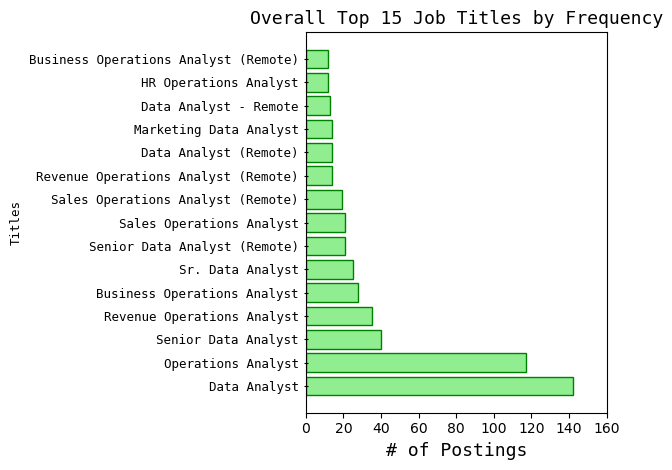

In [96]:

# Create horizontal bar chart for the overall top job titles by frequency
plt.barh(top_overall_title, top_overall_title_nums, align='center', color='lightgreen', edgecolor='green')

# Set x-axis label, title, and ticks
plt.xlabel('# of Postings', fontdict={'family':'monospace','color':'black','size':13})
plt.title('Overall Top 15 Job Titles by Frequency', fontdict={'family':'monospace','color':'black','size':13})
plt.xticks(range(int(min(top_overall_title_nums)), int(max(top_overall_title_nums))+1))
x_major_locator = MultipleLocator(20)
plt.gca().xaxis.set_major_locator(x_major_locator)
plt.xlim(0,160)

# Set y-axis label and font
plt.ylabel('Titles', fontdict={'family':'monospace','color':'black','size':9})
plt.tick_params(axis='y', labelsize=9)
for label in plt.gca().get_yticklabels():
    label.set_fontproperties({'family':'monospace','size':9})

# Adjust y-axis ticks
plt.tick_params(axis='y', which='major', direction='inout')

# Save and display plot
plt.tight_layout()
# plt.savefig('/Users/laceymorgan/Desktop/data_job_analysis/daily_job_overview_visualizations/top_titles_2_28_2023.png')
plt.show()


In [108]:
# Getting the top overall listings sites by frequency

top_overall_announce = df.groupby(df['via']).count()['job_description'].sort_values(ascending=False)[0:15]

top_overall_announce_name = top_overall_announce.index.tolist()
top_overall_announce_nums = top_overall_announce.values.tolist()

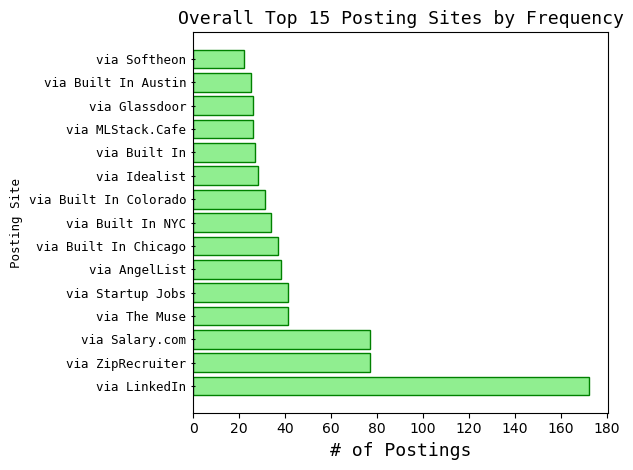

In [112]:

# Create horizontal bar chart for the overall top job titles by frequency
plt.barh(top_overall_announce_name, top_overall_announce_nums, align='center', color='lightgreen', edgecolor='green')

# Set x-axis label, title, and ticks
plt.xlabel('# of Postings', fontdict={'family':'monospace','color':'black','size':13})
plt.title('Overall Top 15 Posting Sites by Frequency', fontdict={'family':'monospace','color':'black','size':13})
plt.xticks(range(int(min(top_overall_announce_nums)), int(max(top_overall_announce_nums))+1))
x_major_locator = MultipleLocator(20)
plt.gca().xaxis.set_major_locator(x_major_locator)

# Set y-axis label and font
plt.ylabel('Posting Site', fontdict={'family':'monospace','color':'black','size':9})
plt.tick_params(axis='y', labelsize=9)
for label in plt.gca().get_yticklabels():
    label.set_fontproperties({'family':'monospace','size':9})

# Adjust y-axis ticks
plt.tick_params(axis='y', which='major', direction='inout')

# Save and display plot
plt.tight_layout()
# plt.savefig('/Users/laceymorgan/Desktop/data_job_analysis/daily_job_overview_visualizations/top_posting_site_2_28_2023.png')
plt.show()


## LinkedIn Analysis

Looking at the total # of listings captured by the SERP API Google Job search, by far the most listings are found on LinkedIn so a deeper looking at those specific postings might yeild interesting insights

In [119]:
link_df = df.loc[df['via'] == 'via LinkedIn']

print(f'{len(link_df)} of the job postings captured were via LinkedIn. That is {round(len(link_df)/len(df)*100,2)}% of the jobs captured')

172 of the job postings captured were via LinkedIn. That is 13.44% of the jobs captured


## Cumulative NLTK Analysis
Looking at the total results of the Natural Learning Toolkit methods applied to the dataset. 

In [120]:
# Define the pattern to match
pattern = r'\b(senior|sr|sr\.|lead|manager|sr .)\b'

# Create a new column that returns a boolean indicating whether the my_keywords column matches the pattern
df['senior_match'] = df['job_title'].str.lower().str.contains(pattern) 

# Examining how many listings are for these senior roles

# Count the number of True values in the senior_match column
num_senior_matches = df['senior_match'].sum()

# print(f'Number of senior roles in the dataset: {num_senior_matches}')
print(f'{(round(num_senior_matches/len(df),2)*100)}% of listings matched as senior roles with a count of: {num_senior_matches}')


20.0% of listings matched as senior roles with a count of: 258


/var/folders/v0/rlrtvnc53g178pfy3_fzt2wm0000gp/T/ipykernel_18785/1640846906.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['senior_match'] = df['job_title'].str.lower().str.contains(pattern)


In [121]:
# Overview of the NLTK generated sentiment scores
df['sentiment_score'].describe()

count    1280.000000
mean        0.980396
std         0.114181
min        -0.926000
25%         0.995700
50%         0.998100
75%         0.999100
max         1.000000
Name: sentiment_score, dtype: float64

## Google Listing Additional info 

In [125]:
# Looking at how many listings NLTK was able to pull salary info from
salary_extract = df.loc[df['salary_mention']!='salary not mentioned']
len(salary_extract)/len(df) *100

# Print the results
print(f'NLTK was able to find the salary mentioned in {(round(len(salary_extract)/len(df) *100))}% of listings had with a count of: {len(salary_extract)}')

NLTK was able to find the salary mentioned in 35% of listings had with a count of: 450


In [126]:
# Overview of the rating information gathered from the google jobs listings endpoint

df['rating'].describe()

count    772.000000
mean       3.766710
std        0.471901
min        1.600000
25%        3.500000
50%        3.800000
75%        4.000000
max        5.000000
Name: rating, dtype: float64

In [131]:
# How many listings were present in the dataset with companies having a perfect 5 rating
five_df = df.loc[df['rating'] ==5]

print(f"Of the {df['rating'].count()} company ratings gathered from the Google jobs listings endpoint, only {len(df.loc[df['rating'] == 5])} listings were posted by companies that had a perfect 5 rating.")

Of the 772 company ratings gathered from the Google jobs listings endpoint, only 4 listings were posted by companies that had a perfect 5 rating.


In [132]:
five_df.head()

,job_title,company_name,job_description,via,job_id,posted_hours_ago,report_run_datetime,apply_options,rating,#_of_reviews,...,salary_to,salary_source,my_keywords,job_description_summary,sentiment_score,salary_mention,named_entity_recognition,job_desc_len,job_sum_len,senior_match
32,Threat Hunting Operations Analyst (100% remote),"Toyota Tsusho Systems US, Inc.","ABOUT TTS-US\n\nFounded in 2011, Toyota Tsusho...",via LinkedIn,eyJqb2JfdGl0bGUiOiJUaHJlYXQgSHVudGluZyBPcGVyYX...,20,2023-02-21 06:39:38,https://www.linkedin.com/jobs/view/threat-hunt...,5.0,10.0,...,54000.0,Salary.com,sql,"Founded in 2011, Toyota Tsusho Systems US, Inc...",0.9701,salary not mentioned,(S\n ABOUT/IN\n TTS-US/NNP\n Founded/NNP\n ...,3650,995,False
1113,"Senior Data Analyst, Team Lead",Atria Wealth Solutions,We are looking for a Senior Data Analyst - Tea...,via Atria Wealth Solutions - JazzHR,eyJqb2JfdGl0bGUiOiJTZW5pb3IgRGF0YSBBbmFseXN0LC...,480,2023-02-22 10:23:14,https://atriawealth.applytojob.com/apply/d8WR4...,5.0,3.0,...,NaN,NaN,sql,"The Sr Data Analyst, Team Lead will be respons...",0.9995,"['range', 'for', 'this', 'position', 'is', '$9...",(S\n We/PRP\n are/VBP\n looking/VBG\n for/...,6984,1207,True
1230,"Senior Data Analyst, Team Lead",Atria Wealth Solutions,We are looking for a Senior Data Analyst - Tea...,via Atria Wealth Solutions - JazzHR,eyJqb2JfdGl0bGUiOiJTZW5pb3IgRGF0YSBBbmFseXN0LC...,504,2023-02-23 06:32:04,https://atriawealth.applytojob.com/apply/d8WR4...,5.0,3.0,...,NaN,NaN,sql,"The Sr Data Analyst, Team Lead will be respons...",0.9995,"['range', 'for', 'this', 'position', 'is', '$9...",(S\n We/PRP\n are/VBP\n looking/VBG\n for/...,6984,1207,True
1400,Business Operations Analyst (Remote),Vynca Inc,Description:\n\nJob Type...\n\nFull time\n\nTh...,via Indeed,eyJqb2JfdGl0bGUiOiJCdXNpbmVzcyBPcGVyYXRpb25zIE...,18,2023-02-24 08:52:29,https://www.indeed.com/viewjob?jk=91ab12c9df64...,5.0,4.0,...,88000.0,Glassdoor,sql,You will work across departments to learn abou...,0.9984,salary not mentioned,(S\n Description/NN\n :/:\n (PERSON Job/NNP...,3645,721,False
